In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt


diamonds_url = "https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/datasets/diamonds.csv"

In [22]:
diamonds_df = pd.read_csv(diamonds_url)
diamonds_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [23]:
diamonds_df.describe(include=object)

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


# Histogram

<AxesSubplot:>

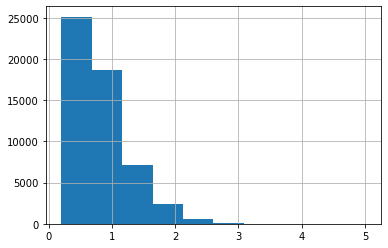

In [24]:
diamonds_df.carat.hist()

array([[<AxesSubplot:title={'center':'carat'}>]], dtype=object)

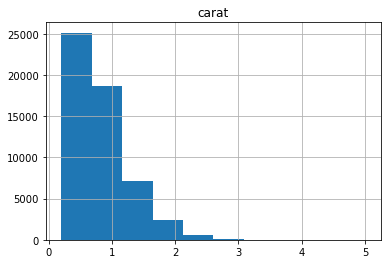

In [25]:
diamonds_df.hist(column=['carat', 'clarity', 'cut'])

Hasil yang didapatkan terlalu general karena bins default dari hist adalah 10 
<br>


In [26]:
diamonds_df.carat[(diamonds_df.carat >= 0.3) & (diamonds_df.carat <= 0.38)]

4        0.31
10       0.30
13       0.31
15       0.32
16       0.30
         ... 
53635    0.30
53636    0.30
53637    0.30
53638    0.30
53639    0.30
Name: carat, Length: 11095, dtype: float64

<AxesSubplot:>

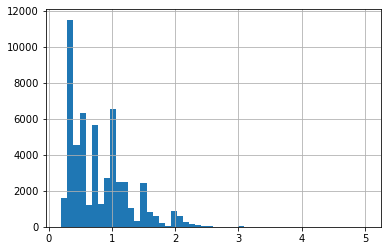

In [27]:
diamonds_df.carat.hist(bins=50)

Apabila kita set bins menjadi 50 dapat dilihat range antara 0.3 sampai 0.4 memiliki frekuensi lebih dari 10000
<br>
Insight yang didapatkan berbeda apabila kita mengsetting bins = 10

/home/rifqoi/.conda/envs/data-exercises/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rifqoi/.conda/envs/data-exercises/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rifqoi/.conda/envs/data-exercises/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

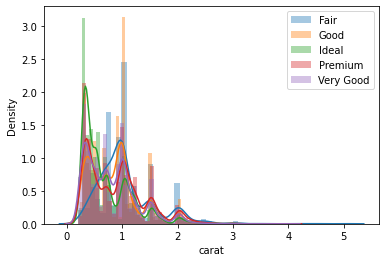

In [28]:
for group, df in diamonds_df.groupby('cut'):
    sns.distplot(df.carat, label=group)

    
plt.legend()
plt.show()

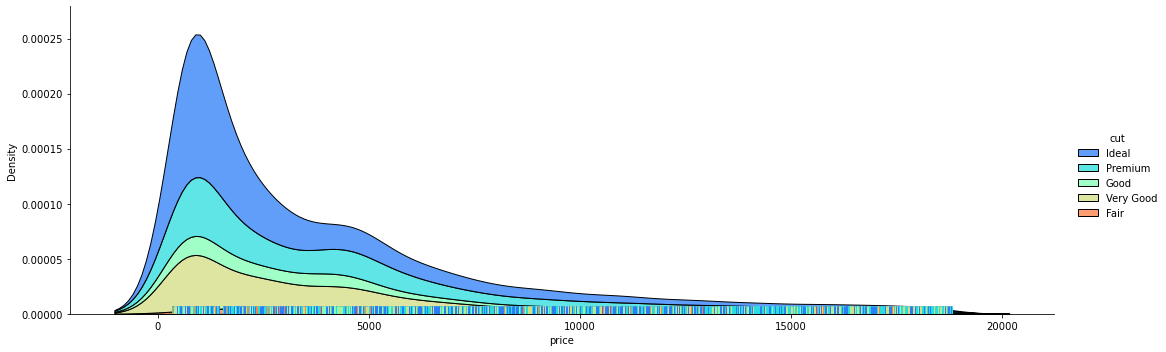

In [29]:
carat_group = pd.Series(diamonds_df.groupby('carat').carat)
sns.displot(data=diamonds_df, x='price', hue='cut', rug=True, palette='rainbow', multiple='stack', aspect=3, kind='kde')

Berbeda dengan pandas.hist, seaborn melakukan plotting histogram berdasarkan distribusi statistik dari dataset
<br>
Density pada nilai y disebut sebagai **Kernel Density Estimation**, KDE menghitung *probability density* dari sebuah variabel
<br>
Usually, a KDE doesn't tell us
anything more than what we can infer from the histogram itself. However, it is
helpful when comparing multiple histograms on the same plot.

/home/rifqoi/.conda/envs/data-exercises/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carat'>

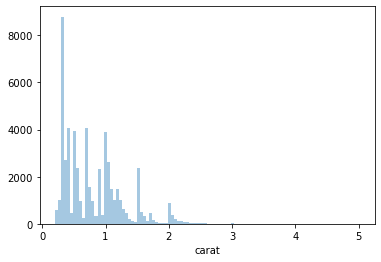

In [30]:
sns.distplot(diamonds_df.carat, kde=False, bins=100)

Histogram dengan bins=100 menunjukkan visualisasi distribusi yang lebih detail dibandingkan bins=50
<br>
Dapat dilihat dari histogram, tail dari kolom carat cenderung ke kanan menunjukkan frekuensi data lebih berpusat pada nilai yang rendah
<br>
Sehingga distribusi histogram dari kolom carat *right skewed*

<AxesSubplot:xlabel='price'>

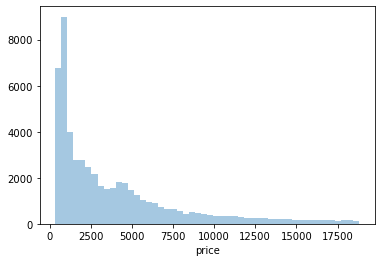

In [31]:
sns.distplot(diamonds_df.price, kde=False)

<AxesSubplot:xlabel='price'>

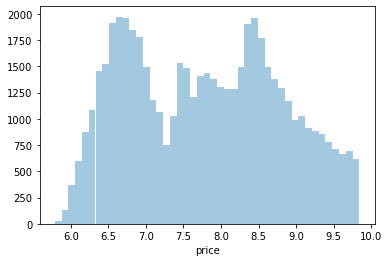

In [32]:
sns.distplot(np.log(diamonds_df.price), kde=False)

Log transformation digunakan untuk membuat data yang skewed menjadi kurang skewed dan menyerupai distribusi normal
<br>
Log transformation biasanya digunakan untuk mengidentifikasi tren dari data, dan mengurangi variability dari sebuah data.
<br>
Dapat dilihat diatas terdapat dua peak pada histogram. Ini menunjukkan dua tipe dari diamonds, diamond dengan harga yang mahal dan diamond dengan harga ynag murah

- Which feature values are more frequent in the dataset (in this case, there is a peak
at around 6.8 and another peak between 8.5 and 9—note that log(price) =
values, in this case,
- How many peaks exist in the data (the peaks need to be further inspected for
possible causes in the context of the data)
- Whether there are any outliers in the data

/home/rifqoi/.conda/envs/data-exercises/lib/python3.9/site-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/rifqoi/.conda/envs/data-exercises/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/rifqoi/.conda/envs/data-exercises/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<AxesSubplot:>

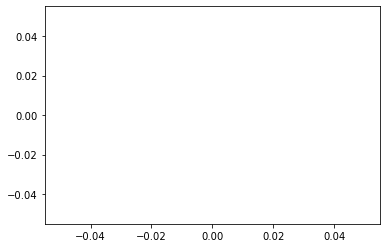

In [33]:
sns.distplot()

# Bar Plot

Bar Plot berguna untuk melihat jumlah dari data kategorikal.

Secara umum, Bar Plot digunakan untuk mengetahui hubungan dari variabel kategorikal dengan variabel numerik dari data.

Sedangkan, histogram digunakan untuk mengetahui distribusi dari sebuah data numerikal yang
 kontinu

In [34]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [35]:
# Melihat jumlah data unique pada kolom
display(diamonds_df.cut.unique())

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [36]:
display(diamonds_df.clarity.unique())

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [37]:
# Untuk membuat table dari jumlah data yang unique pada dataframe menggunakan pd.crosstab
cut_count_table = pd.crosstab(diamonds_df.cut, 'count')
cut_count_table = pd.crosstab(index=diamonds_df.cut, columns ='count')
cut_count_table

col_0,count
cut,
Fair,1610
Good,4906
Ideal,21551
Premium,13791
Very Good,12082


<AxesSubplot:xlabel='cut'>

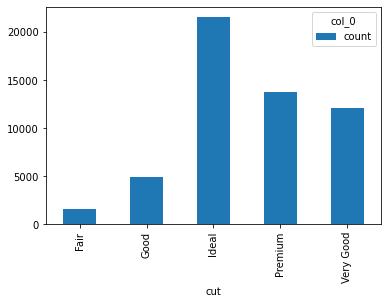

In [38]:
# Buat bar plot dari cut_count_table dengan pandas.plot
cut_count_table.plot(kind='bar')

/home/rifqoi/.conda/envs/data-exercises/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


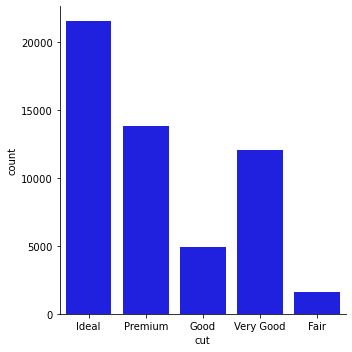

In [39]:
# Buat bar plot menggunakan seaborn
sns.catplot("cut", data=diamonds_df, kind="count", color="b")

Dapat dilihat untuk membuat bar plot di seaborn tidak membutuhkan table tambahan (pd.crosstab) sebelum di plot

/home/rifqoi/.conda/envs/data-exercises/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

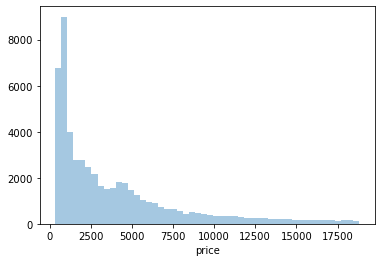

In [40]:
sns.distplot(diamonds_df.price, kde=False)
display(diamonds_df.price.describe())

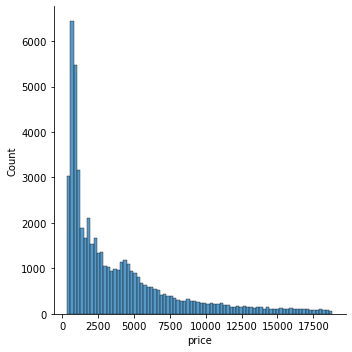

In [41]:
sns.displot(diamonds_df.price, kde=False)

Membuat plot distribusi mean dari price untuk setiap kualitas *cut*

<AxesSubplot:xlabel='cut', ylabel='price'>

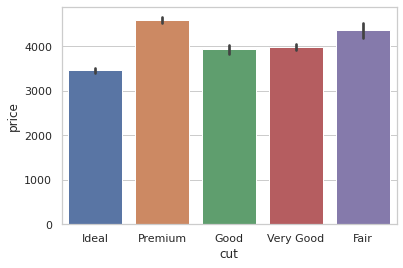

In [42]:
sns.set(style='whitegrid')
sns.barplot(x="cut", y="price", data=diamonds_df, estimator=np.mean)

Here, the black lines (error bars) on the rectangles indicate the uncertainty (or spread of values) around the mean estimate.
<br>
By default, this value is set to 95%  confidence. <br>
How do we change it? We use the ci=68 parameter, for instance, to set it to 68%. We can also plot the standard deviation in the prices using ci=sd

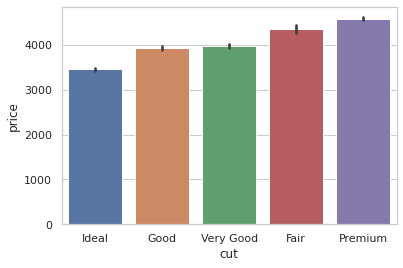

In [43]:
ax = sns.barplot(x="cut", y="price", data=diamonds_df, estimator=np.mean, ci=68, order=['Ideal', 'Good', 'Very Good', 'Fair', 'Premium'])

<AxesSubplot:xlabel='price', ylabel='cut'>

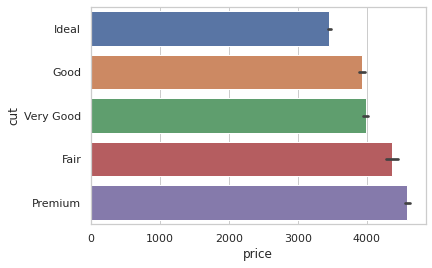

In [44]:
# Mengganti axis dari price dan cut
sns.barplot(x="price", y="cut", data=diamonds_df, estimator=np.mean, ci=68, order=['Ideal', 'Good', 'Very Good', 'Fair', 'Premium'])

## Grouped bar plot

Grouped bar plots berguna untuk membuat bar plot dari banyak data.

Dibawah ini membuat distribusi bar plot jumlah rata-rata price dari kolom cut untuk setiap color

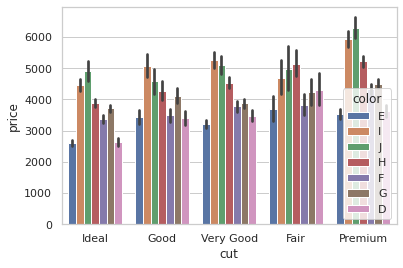

In [45]:
ax = sns.barplot(x="cut", y="price", hue="color", data=diamonds_df, estimator=np.mean, order=['Ideal', 'Good', 'Very Good', 'Fair', 'Premium'])

In [51]:
pd.isna(diamonds_df.iloc[:])

,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False
